# Lab 4 

In this lab, we will be faced with a regression problem. We have to guess the age of abalone(a type of marine snail) based on other given data. 

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('abalone.data',sep = ' ')

In [2]:
data.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age(rings)
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
data.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age(rings)
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [4]:
data.columns

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'age(rings)'],
      dtype='object')

## Data Exploration


In regression analysis, the visualization plays a huge part in the steps ahead, more than classification, because ultimately the labels will be an unbound numerical value. In classification, there will be a finite number of different classes/labels. In regression, however, the output can be any numerical value. 

### Task 1: Numerical variable analysis

Correlation plays a huge part in deciding the output of a regression problem. The more correlated a variable is to the target variable, the more important it is as a feature for training the model. 

Q1. Create a scatter plot with a linearly regressive line between length and age(rings).

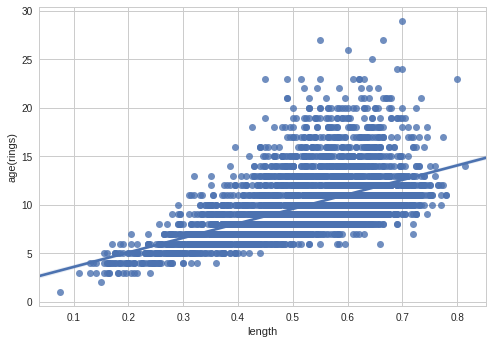

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
#TODO
sns.regplot(x='length',y='age(rings)',data = data)

plt.show()

Q2. Create a scatter plot with a polynomial best fit line of order 2 between whole_weight and age(rings).

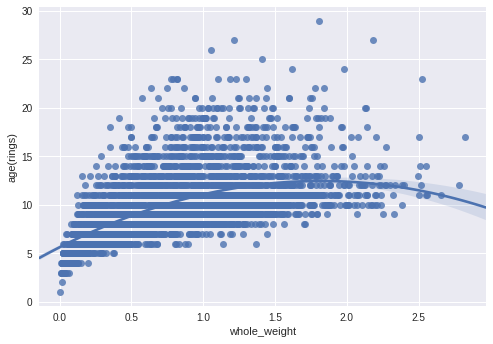

In [6]:
#TODO
sns.regplot(x='whole_weight',y='age(rings)',data = data,order=2)

plt.show()

Q3. Create a diagonal correlation heatmap, with the correlation method being Kendall rank correlation, and ensure that the correlation values are annotated on the heatmap.

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


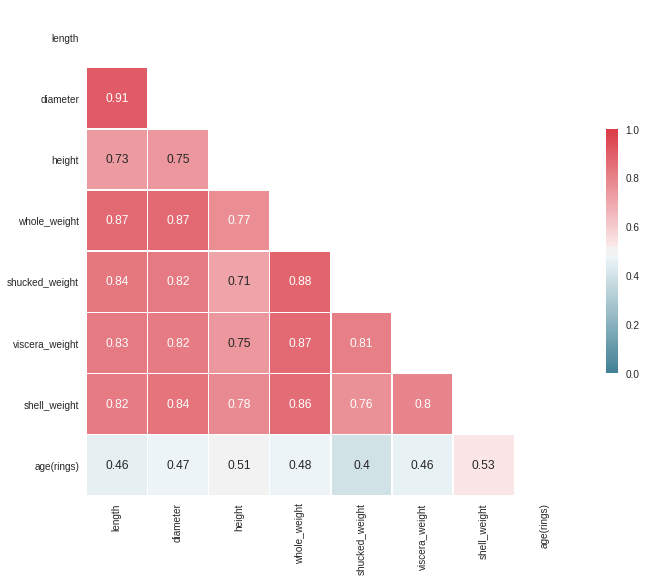

In [7]:
#TODO
sns.set_style("whitegrid")

corr = data.corr(method='kendall')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0.5,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

plt.show()

plt.show()

Q4. Create a FacetGrid which shows two scatterplots between diameter and age(rings), one for each sex.

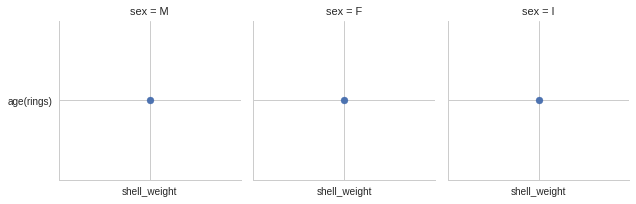

In [8]:
#TODO
#This error came up on my laptop due to an issue with seaborn, but the code is correct
g=sns.FacetGrid(data, col = 'sex')
g.map(plt.scatter,x='shell_weight',y='age(rings)')

plt.show()

Q5. Feel free to try out other visualizations.

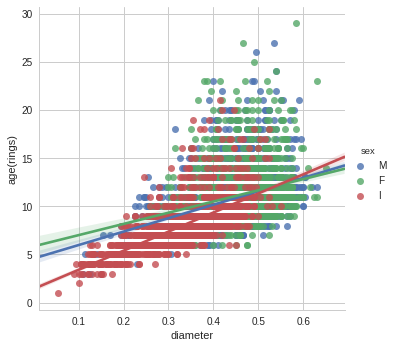

In [27]:
#TODO

sns.lmplot(x='diameter',y='age(rings)',data = data,hue='sex')

plt.show()

## Feature Engineering 

Using all features in a problem like this increases dimensionality, which not only makes computation slow, but can prevent the model reaching peak performance.

### Task 2: Feature Selection

Q6. Select an appropriate number of features for the training data, and assign it to variables. In case you want to use categorical data, remember to one-hot encode. 

In [62]:
#TODO

variables = data[['diameter','shell_weight','height']]

### Task 3:Feature Scaling

Q7. Do the necessary scaling on the data.

In [63]:
from sklearn.preprocessing import RobustScaler
#TODO
#scaler = RobustScaler().fit_transform(variables)

X = variables
y = data['age(rings)'].tolist()

In [64]:
y

[15,
 7,
 9,
 10,
 7,
 8,
 20,
 16,
 9,
 19,
 14,
 10,
 11,
 10,
 10,
 12,
 7,
 10,
 7,
 9,
 11,
 10,
 12,
 9,
 10,
 11,
 11,
 12,
 15,
 11,
 10,
 15,
 18,
 19,
 13,
 8,
 16,
 8,
 11,
 9,
 9,
 14,
 5,
 5,
 4,
 7,
 9,
 7,
 6,
 9,
 8,
 7,
 10,
 10,
 7,
 8,
 8,
 8,
 4,
 7,
 7,
 9,
 10,
 7,
 8,
 8,
 12,
 13,
 10,
 6,
 13,
 8,
 20,
 11,
 13,
 15,
 9,
 10,
 11,
 14,
 9,
 12,
 16,
 21,
 14,
 12,
 13,
 10,
 9,
 12,
 15,
 12,
 13,
 10,
 15,
 14,
 9,
 8,
 7,
 10,
 7,
 15,
 15,
 10,
 12,
 12,
 11,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 11,
 11,
 11,
 10,
 9,
 8,
 9,
 7,
 14,
 6,
 6,
 5,
 6,
 8,
 19,
 18,
 17,
 9,
 7,
 7,
 7,
 8,
 7,
 9,
 9,
 9,
 10,
 10,
 16,
 11,
 10,
 10,
 10,
 9,
 5,
 4,
 15,
 9,
 10,
 10,
 12,
 10,
 13,
 16,
 13,
 13,
 13,
 13,
 12,
 18,
 16,
 14,
 20,
 20,
 14,
 12,
 14,
 7,
 8,
 8,
 5,
 7,
 5,
 8,
 4,
 11,
 14,
 21,
 10,
 10,
 12,
 13,
 12,
 10,
 11,
 9,
 13,
 12,
 14,
 8,
 10,
 12,
 11,
 16,
 15,
 10,
 9,
 13,
 12,
 13,
 8,
 9,
 9,
 8,
 13,
 7,
 10,
 7,
 12,
 9,
 14,
 10,
 8,
 7,
 

## Model Selection and Training

Q8. Split training and testing set.

In [65]:
from sklearn.model_selection import train_test_split
#TODO
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.33,random_state=42)


### Task 4: Defining Performance Metrics

It must be remembered that different types of machine learning problems carry different evaluations metrics. Therefore for regression, we cannot have metrics like precision and accuracy, which belong to classification tasks, to evaluate a model. We will analyze our model with 3 metrics: Root mean squared error, R2-score(coefficient of determination), and explained variance score.

Q9. Complete the function below, which returns the above mentioned metrics. Import the necessary tools via scikit-learn

In [66]:
#TODO
from sklearn.metrics import explained_variance_score,mean_squared_error,r2_score


def performance_metrics(y_true,y_pred):
    rmse = mean_squared_error(y_true,y_pred)
    r2 = r2_score(y_true,y_pred)
    explained_var_score = explained_variance_score(y_true,y_pred)
    
    return rmse,r2,explained_var_score



### Task 5: Model Selection

Finally, we select a model and train it. One note to keep in mind, now that we are working on a regression problem, remember that we will be using Regressors, not Classifiers. 

Q10. Instantiate any Regressor, such as DecisionTreeRegressor, and train it on the training data.

In [69]:
#TODO
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor().fit(X_train,y_train)


Q11. Generate predictions from the validation set, and output the above-mentioned scores.

In [70]:
#TODO
y_pred = regressor.predict(X_val)

rmse,r2,explained_var_score = performance_metrics(y_val,y_pred)

print("Root mean squared error:{} \nR2-score:{} \nExplained variance score:{}".format(rmse,r2,explained_var_score))

Root mean squared error:6.755552128378545 
R2-score:0.3333926827215006 
Explained variance score:0.33544772188256344


### Task 6: Hyperparameter Tuning

We will use GridSearchCV for this.

Q12. Perform Grid Search over your model, choosing any one of the above-mentioned performance metrics as a scoring function. Choose any hyperparameters(depends on your regressor), and tune your model.

In [74]:
#TODO
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state=42)


#TODO
clf = RandomForestRegressor()        #Initialize the classifier object

parameters = {'max_depth':[5,10,20,30]}    #Dictionary of parameters

scorer = make_scorer(r2_score)         #Initialize the scorer using make_scorer

grid_obj = GridSearchCV(clf,parameters,scoring=scorer)         #Initialize a GridSearchCV object with above parameters,scorer and classifier

grid_fit = grid_obj.fit(X_train,y_train)        #Fit the gridsearch object with X_train,y_train

best_clf = grid_fit.best_estimator_         #Get the best estimator. For this, check documentation of GridSearchCV object

unoptimized_predictions = (clf.fit(X_train, y_train)).predict(X_test)      #Using the unoptimized classifiers, generate predictions
optimized_predictions = best_clf.predict(X_test)        #Same, but use the best estimator

acc_unop = r2_score(y_test, unoptimized_predictions)       #Calculate accuracy for unoptimized model
acc_op = r2_score(y_test, optimized_predictions)         #Calculate accuracy for optimized model

print("Accuracy score on unoptimized model:{}".format(acc_unop))
print("Accuracy score on optimized model:{}".format(acc_op))

Accuracy score on unoptimized model:0.34026578220860404
Accuracy score on optimized model:0.46312854150752203


Q13. Output the above-mentioned scores for the optimized model(generate predictions on validation set), and print the optimal parameter values for the model(e.g. for DecisionTreeRegressor, print the optimal value of max_depth if you have iterated over it in GridSearch).

In [77]:
#TODO
y_pred_op = best_clf.predict(X_val)

rmse_op,r2_score_op,explained_var_score_op = performance_metrics(y_val,y_pred_op)

op_params = best_clf.get_params()

print("Root mean squared error:{} \nR2-score:{} \nExplained variance score:{}".format(rmse_op,r2_score_op,explained_var_score_op))
print("\n\nOptimal parameter values:{}".format(op_params))

Root mean squared error:5.440779046488173 
R2-score:0.46312854150752203 
Explained variance score:0.4634947025394335


Optimal parameter values:{'n_jobs': 1, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'bootstrap': True, 'random_state': None, 'criterion': 'mse', 'verbose': 0, 'max_depth': 5, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.0, 'warm_start': False, 'max_features': 'auto', 'oob_score': False, 'n_estimators': 10, 'min_samples_split': 2}


Q14. Try other models, and try to improve your scores.